# Practice Exercise: Exploring data (Exploratory Data Analysis)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Context:
- The data includes 120 years (1896 to 2016) of Olympic games with information about athletes and medal results.
- In general, this dataset is popular to explore how the Olympics have evolved over time, including the participation and performance of different genders, different countries, in various sports and events.



## Dataset Description:

We'll work on the data within athlete_events.csv.

Each row corresponds to an individual athlete competing in an individual Olympic event.

The columns are:
- **ID**: Unique number for each athlete
- **Name**: Athlete's name
- **Sex**: M or F
- **Age**: Integer
- **Height**: In centimeters
- **Weight**: In kilograms
- **Team**: Team name
- **NOC**: National Olympic Committee 3-letter code
- **Games**: Year and season
- **Year**: Integer
- **Season**: Summer or Winter
- **City**: Host city
- **Sport**: Sport
- **Event**: Event
- **Medal**: Gold, Silver, Bronze, or NA

## Objective:
   - Examine/clean the dataset
   - Explore distributions of single numerical and categorical features via statistics and plots
   - Explore relationships of multiple features via statistics and plots

We are only going to explore part of the dataset, please feel free to explore more if you are interested.

### 1. Import the libraries `Pandas` and `Seaborn`

In [ ]:
import pandas as pd
import seaborn as sns


### 2. Import the data from the csv file as DataFrame `olympics`

In [ ]:
olympics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assets/athlete_events.csv')

### 3. Look at the info summary, head of the DataFrame

In [ ]:
print(olympics.info())
print(olympics.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2               

### 4. Impute the missing data

#### Use `IterativeImputer` in `sklearn` to impute based on columns `Year`, `Age`, `Height`, `Weight`

##### Import libraries

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `Year`, `Age`, `Height`, `Weight`
The column `Year` doesn't have mssing values, but we include it since it might be helpful modeling the other three columns. The age, height, and weight could change across years.

In [ ]:
cols_to_impute = ['Year', 'Age', 'Height', 'Weight']

##### Create an `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [ ]:
iter_imp = IterativeImputer(min_value=olympics[cols_to_impute].min(), max_value=olympics[cols_to_impute].max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [ ]:
imputed_cols = iter_imp.fit_transform(olympics[cols_to_impute])

##### Assign the imputed array back to the original DataFrame's columns

In [ ]:
olympics[cols_to_impute] = imputed_cols

#### Fill the missing values in the column `Medal` with string of 'NA'

In [ ]:
olympics[cols_to_impute] = imputed_cols

#### Double check that the columns are all imputed

In [ ]:
olympics.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### 5. Use the `describe` method to check the numerical columns

In [ ]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.600403,175.280009,70.952869,1978.378480
std,39022.286345,6.286884,9.348504,12.804718,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000
50%,68205.000000,25.000000,174.985438,70.064758,1988.000000
75%,102097.250000,28.000000,180.000000,77.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### 6. Plot the histograms of the numerical columns using `Pandas`

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

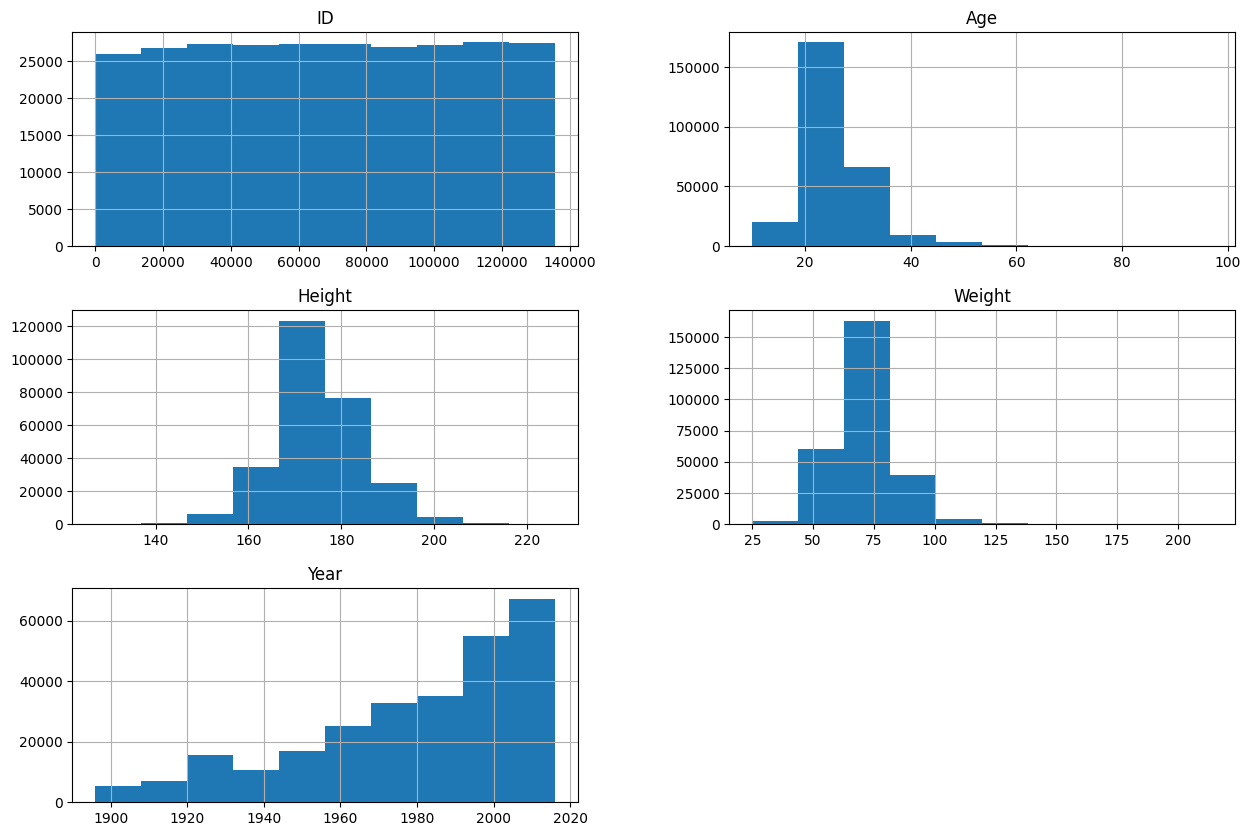

In [ ]:
olympics.hist(figsize=(15, 10))

### 7. Plot the histogram with a rug plot of the column `Age` using `Seaborn`, with both 20 and 50 bins

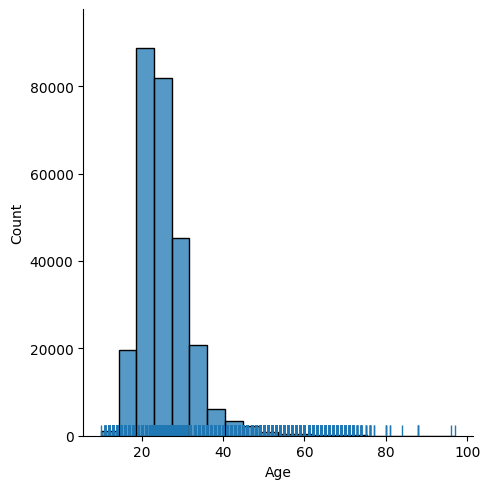

In [ ]:
sns.displot(data=olympics, x='Age', bins=20, rug=True)

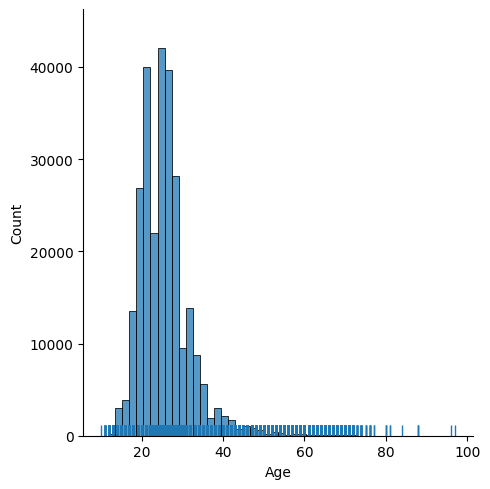

In [ ]:
sns.displot(data=olympics, x='Age', bins=50, rug=True)

### 8. Plot the boxplot of the column `Age` using `Pandas`

<Axes: >

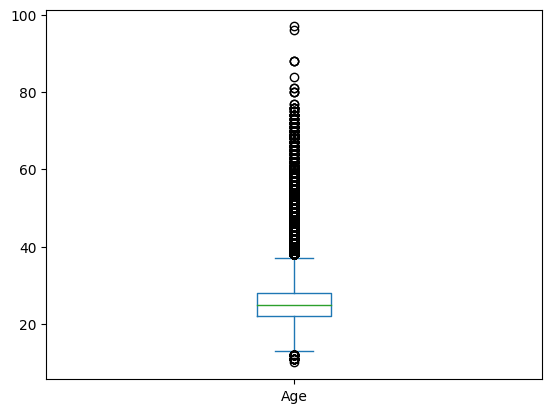

In [ ]:
olympics['Age'].plot(kind='box')

### 9. Plot the boxplot of the column `Age` using `Seaborn`

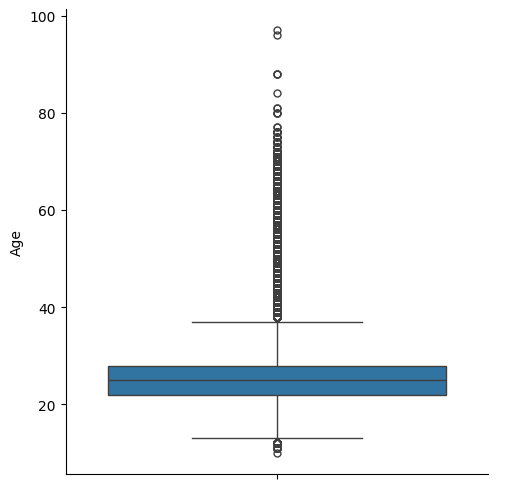

In [ ]:
sns.catplot(data=olympics, y='Age', kind='box')

### 10. Calculate the first quartile, third quartile, and IQR of the column `Age`

In [ ]:
Q1 = olympics['Age'].quantile(0.25)
Q3 = olympics['Age'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
print(Q1)
print(Q3)
print(IQR)

22.0
28.0
6.0


### 11. Print out the lower and upper thresholds for outliers based on IQR for the column `Age`

In [ ]:
print(f'Low age outlier threshold: {Q1 - 1.5*IQR}')
print(f'High age outlier threshold: {Q3 + 1.5*IQR}')

Low age outlier threshold: 13.0
High age outlier threshold: 37.0


### 12. What are the `Sport` for the athletes of really young age

#### Filter for the column `Sport` when the column `Age` has outliers of lower values

In [ ]:
msk_lower = (olympics['Age'] < (Q1 - 1.5*IQR))
olympics.loc[msk_lower,'Sport']

9648            Swimming
9649            Swimming
9650            Swimming
43468     Figure Skating
46955             Rowing
50291           Swimming
50292           Swimming
50293           Swimming
50294           Swimming
60911     Figure Skating
73461             Rowing
79024         Gymnastics
79352     Figure Skating
84361             Rowing
85840           Swimming
91910           Swimming
91911           Swimming
91912           Swimming
91913           Swimming
93850           Swimming
94058     Figure Skating
96236           Swimming
96665     Figure Skating
97086     Figure Skating
101378    Figure Skating
102916    Figure Skating
108031    Figure Skating
118048    Figure Skating
120233          Swimming
120234          Swimming
126542    Figure Skating
140650    Figure Skating
142882        Gymnastics
145150        Gymnastics
148942        Gymnastics
149033          Swimming
152798    Figure Skating
168941         Athletics
168942         Athletics
192507            Diving


#### Look at the unique values of `Sport` and their counts when `Age` are low-valued outliers

Did you find any sports popular for really young athletes?

In [ ]:
olympics.loc[msk_lower,'Sport'].value_counts()

Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: Sport, dtype: int64

### 13. What are the `Sport` for the athletes of older age

#### Filter for the column `Sport` when the column `Age` has outliers of higher values

In [ ]:
msk_upper = (olympics['Age'] > (Q3 + 1.5*IQR))
olympics.loc[msk_upper,'Sport']

58        Art Competitions
89                 Sailing
90                 Sailing
124               Shooting
126               Shooting
                ...       
270955    Art Competitions
270970           Athletics
270971           Athletics
270972           Athletics
271090             Sailing
Name: Sport, Length: 11928, dtype: object

#### Look at the unique values of `Sport` and their counts when `Age` are high-valued outliers
Did you find any sports popular for older age athletes?

In [ ]:
olympics.loc[msk_upper,'Sport'].value_counts()

Shooting                 3178
Art Competitions         2226
Equestrianism            1997
Sailing                  1040
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Handball                   29
Water Polo                 29
Hockey                     29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16
Tug-Of-War                 15
Volleyball                 15
Judo      

### 14. Check for the number of unique values in each column

In [ ]:
olympics.nunique()

ID        135571
Name      134732
Sex            2
Age          785
Height      2475
Weight      3565
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

### 15. Use the `describe` method to check the non-numerical columns

In [ ]:
olympics.describe(exclude='number')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


### 16. Apply the `value_counts` method for each non-numerical column, check for their unique values and counts

In [ ]:
cat_cols = olympics.select_dtypes(exclude='number').columns
cat_cols

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [ ]:
for col in cat_cols:
    print(olympics[col].value_counts())
    print()

Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64

M    196594
F     74522
Name: Sex, dtype: int64

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64

2000 Summer    13821
1996 Summer    13780
2016 Sum

### 17. Check the first record within the dataset for each Olympic `Sport`

*Hint: sort the DataFrame by `Year`, then groupby by `Sport`*

In [ ]:
olympics.sort_values('Year').groupby('Sport').first()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,107506,Hermann Schreiber,M,26.000000,174.589865,71.098729,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold
Alpine Skiing,32818,Reat Erce,M,17.000000,172.439922,66.363886,Turkey,TUR,1936 Winter,1936.0,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,Gold
Alpinism,74134,George Herbert Leigh Mallory,M,37.000000,176.995129,76.867544,Great Britain,GBR,1924 Winter,1924.0,Winter,Chamonix,Alpinism Mixed Alpinism,Gold
Archery,67722,Lecomte,M,27.618563,174.310796,71.897322,France,FRA,1900 Summer,1900.0,Summer,Paris,"Archery Men's Au Cordon Dore, 50 metres",Gold
Art Competitions,48741,Konrad Hippenmeier,M,31.000000,175.339389,73.692765,Switzerland,SUI,1912 Summer,1912.0,Summer,Stockholm,Art Competitions Mixed Architecture,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,86368,August Nilsson,M,27.000000,174.161415,71.570173,Denmark/Sweden,SWE,1900 Summer,1900.0,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
Volleyball,14306,Georgi Spasov Boyadzhiev,M,21.000000,177.000000,76.000000,Bulgaria,BUL,1964 Summer,1964.0,Summer,Tokyo,Volleyball Men's Volleyball,Bronze
Water Polo,74733,Auguste Jean Baptiste Louis Joseph Marc,M,19.000000,172.250355,67.361423,Pupilles de Neptune de Lille #2-1,FRA,1900 Summer,1900.0,Summer,Paris,Water Polo Men's Water Polo,Bronze


### 18. What are the average `Age`, `Height`, `Weight` of female versus male Olympic athletes

In [ ]:
olympics.groupby('Sex')[['Age','Height','Weight']].mean()

,Age,Height,Weight
Sex,,,
F,23.748234,168.476034,60.960650
M,26.302496,177.859161,74.740574


### 19. What are the minimum, average, maximum `Age`, `Height`, `Weight` of athletes in different `Year`

In [ ]:
olympics.groupby('Year')[['Age','Height','Weight']].agg(['min', 'mean', 'max'])

Age                  Height                             Weight  \
         min       mean   max    min        mean         max        min   
Year                                                                      
1896.0  10.0  25.364356  40.0  154.0  173.569607  188.000000  45.000000   
1900.0  13.0  28.454101  71.0  153.0  174.664627  191.000000  51.000000   
1904.0  14.0  26.867754  71.0  155.0  174.435046  195.000000  43.000000   
1906.0  13.0  27.272610  54.0  165.0  174.946975  196.000000  52.000000   
1908.0  14.0  27.061116  61.0  157.0  175.059627  201.000000  51.000000   
1912.0  13.0  27.528582  67.0  157.0  175.149494  200.000000  49.000000   
1920.0  13.0  28.861062  72.0  142.0  175.220153  218.770915  33.074491   
1924.0  11.0  28.101622  81.0  142.0  174.980222  218.578230  34.356723   
1928.0  11.0  28.728275  97.0  147.0  175.282553  211.000000  41.000000   
1932.0  11.0  32.002855  96.0  147.0  175.826347  200.000000  40.090648   
1936.0  11.0  27.506104  74.0  147.0  175.155241  205.000000  37.000000   
1948.0  12.0  28.407495  84.0  140.0  175.567741  213.000000  47.000000   
1952.0  12.0  26.165217  65.0  150.0  174.812820  213.000000  42.000000   
1956.0  12.0  25.949715  67.0  137.0  174.607226  218.000000  28.000000   
1960.0  11.0  25.187182  65.0  137.0  173.316035  218.000000  36.000000   
1964.0  12.0  24.948374  60.0  137.0  173.546073  218.000000  38.000000   
1968.0  11.0  24.263374  68.0  127.0  173.959439  216.000000  34.000000   
1972.0  12.0  24.318900  69.0  130.0  174.562405  223.000000  38.000000   
1976.0  12.0  23.850452  70.0  136.0  174.865117  220.000000  30.000000   
1980.0  13.0  23.734613  70.0  131.0  175.508742  220.000000  25.000000   
1984.0  12.0  23.925675  60.0  132.0  175.524970  218.000000  31.000000   
1988.0  11.0  24.085104  70.0  127.0  175.698459  223.000000  32.000000   
1992.0  11.0  24.319680  62.0  136.0  175.959574  226.000000  30.000000   
1994.0  13.0  24.422594  46.0  148.0  175.158296  200.000000  40.000000   
1996.0  12.0  24.915179  63.0  136.0  175.836214  223.000000  30.000000   
1998.0  14.0  25.163160  50.0  142.0  174.589636  200.000000  32.000000   
2000.0  13.0  25.422476  63.0  136.0  176.085713  226.000000  28.000000   
2002.0  15.0  25.916281  48.0  149.0  174.709888  201.000000  42.000000   
2004.0  13.0  25.639515  57.0  139.0  175.971393  226.000000  30.000000   
2006.0  14.0  25.959151  52.0  147.0  174.628393  206.000000  38.000000   
2008.0  12.0  25.733541  67.0  137.0  176.209780  226.000000  28.000000   
2010.0  15.0  26.124262  51.0  149.0  174.918873  206.000000  38.000000   
2012.0  13.0  25.961378  71.0  140.0  176.247158  221.000000  30.071474   
2014.0  15.0  25.987324  55.0  146.0  174.818773  206.000000  38.066881   
2016.0  13.0  26.207919  62.0  133.0  176.024469  218.000000  30.000000   

                          
             mean    max  
Year                      
1896.0  70.982411  106.0  
1900.0  72.502816  102.0  
1904.0  71.715326  115.0  
1906.0  72.309427  114.0  
1908.0  72.484058  115.0  
1912.0  72.354296  125.0  
1920.0  72.791440  146.0  
1924.0  72.217506  146.0  
1928.0  72.568654  125.0  
1932.0  73.867313  110.0  
1936.0  71.960859  138.0  
1948.0  72.408041  125.0  
1952.0  71.097510  145.0  
1956.0  71.041599  141.0  
1960.0  69.480564  141.0  
1964.0  69.759825  163.0  
1968.0  69.609517  163.0  
1972.0  70.003339  182.0  
1976.0  70.000335  163.0  
1980.0  70.624903  190.0  
1984.0  70.257754  150.0  
1988.0  70.443543  161.0  
1992.0  70.862030  176.5  
1994.0  70.972262  113.0  
1996.0  70.818289  176.5  
1998.0  70.898616  123.0  
2000.0  71.106805  180.0  
2002.0  71.164405  123.0  
2004.0  71.284135  198.0  
2006.0  70.512440  127.0  
2008.0  71.375322  214.0  
2010.0  70.733917  116.0  
2012.0  71.173434  214.0  
2014.0  70.572661  116.0  
2016.0  70.966084  170.0

### 20. What are the minimum, average, median, maximum `Age` of athletes for different `Season` and `Sex` combinations

In [ ]:
olympics.groupby(['Season', 'Sex'])['Age'].agg(['min', 'mean', 'median', 'max'])

min       mean  median   max
Season Sex                               
Summer F    11.0  23.680377    23.0  74.0
       M    10.0  26.464649    25.0  97.0
Winter F    11.0  24.015736    24.0  48.0
       M    12.0  25.512635    25.0  58.0

### 21. What are the average `Age` of athletes, and numbers of unique `Team`, `Sport`, `Event`, for different `Season` and `Sex` combinations

In [ ]:
olympics.groupby(['Season', 'Sex']).agg({'Age': 'mean', 'Team': 'nunique', 'Sport': 'nunique', 'Event': 'nunique'})

Age  Team  Sport  Event
Season Sex                               
Summer F    23.680377   352     40    214
       M    26.464649  1118     49    491
Winter F    24.015736   144     14     57
       M    25.512635   214     17     67

### 22. What are the average `Age`, `Height`, `Weight` of athletes, for different `Medal`, `Season`, `Sex` combinations

In [ ]:
olympics.groupby(['Medal', 'Season', 'Sex'])[['Age', 'Height', 'Weight']].mean()

Age      Height     Weight
Medal  Season Sex                                  
Bronze Summer F    24.637527  171.110734  63.903325
              M    26.382673  179.283138  76.834194
       Winter F    25.115578  167.339043  61.132946
              M    26.387043  178.831087  77.296962
Gold   Summer F    24.215093  171.594933  64.252235
              M    26.501307  179.803255  77.426878
       Winter F    25.202636  167.563734  62.006768
              M    26.606436  179.569202  78.047604
Silver Summer F    24.296089  171.310947  63.903671
              M    26.690500  179.391244  77.017761
       Winter F    25.240527  167.916040  61.921625
              M    26.430566  179.030573  77.429293

### 23. Plot the scatterplot of `Height` and `Weight`

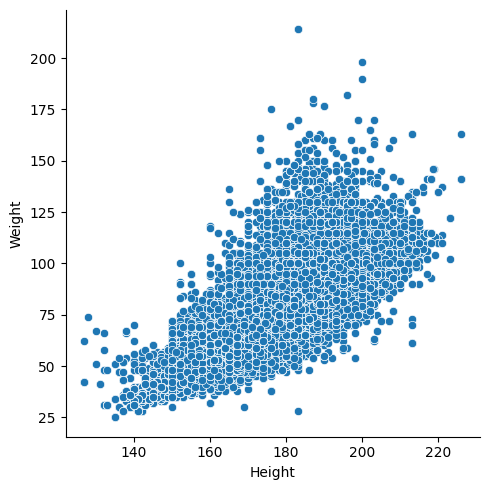

In [ ]:
sns.relplot(data=olympics, x='Height', y='Weight', kind='scatter')

### 24. Plot the scatterplot of `Height` and `Weight`, using different colors and styles of dots for different `Sex`

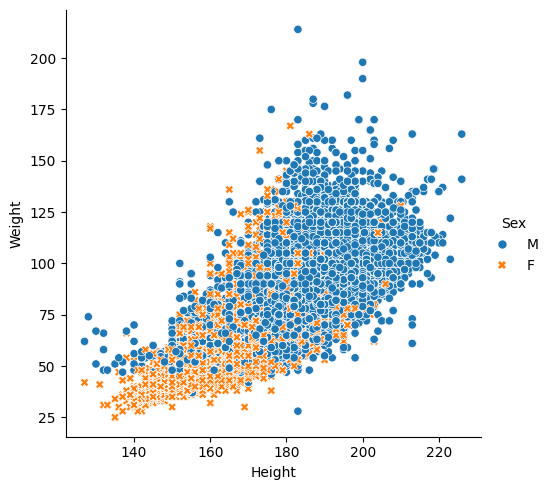

In [ ]:
sns.relplot(data=olympics, x='Height', y='Weight', hue='Sex', style='Sex')

### 25. Plot the pairwise relationships of `Age`, `Height`, `Weight`

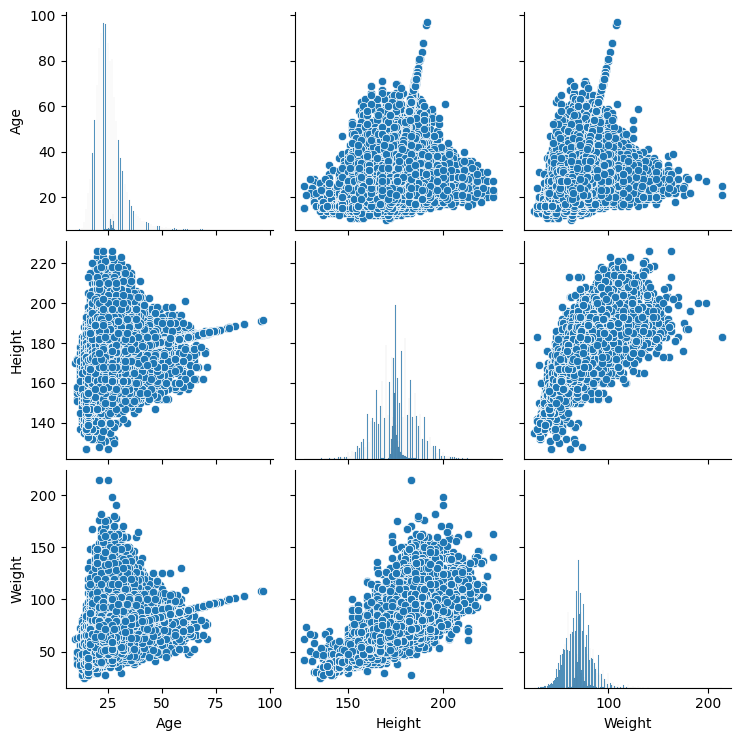

In [ ]:
sns.pairplot(olympics[['Age', 'Height', 'Weight']])

### 26. Plot the pairwise relationships of `Age`, `Height`, `Weight`, with different colors for `Sex`

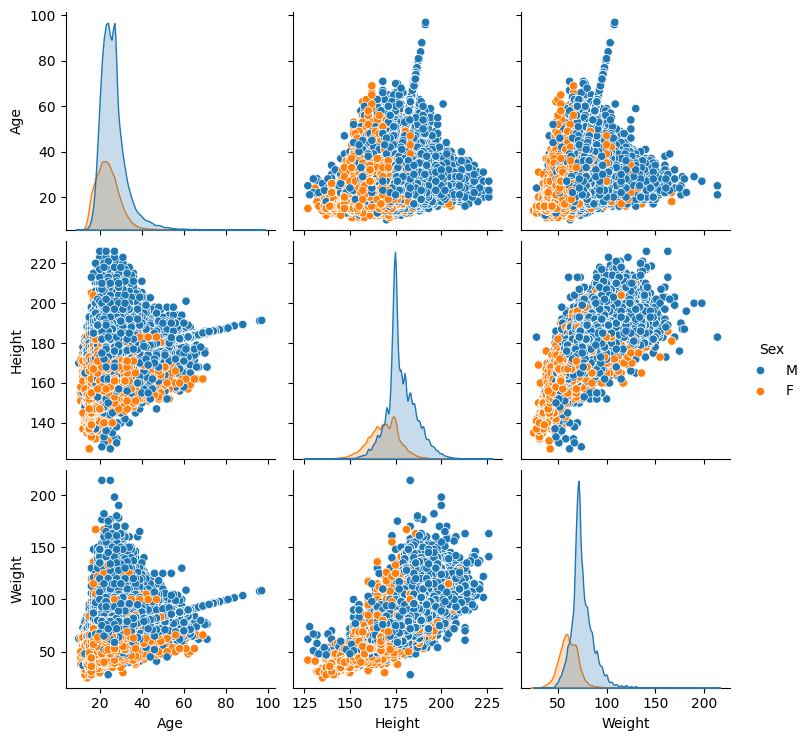

In [ ]:
sns.pairplot(olympics[['Age', 'Height', 'Weight', 'Sex']], hue='Sex')

### 27. Print out the correlation matrix of `Age`, `Height`, `Weight`

In [ ]:
olympics[['Age', 'Height', 'Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.161797,0.264409
Height,0.161797,1.000000,0.799258
Weight,0.264409,0.799258,1.000000


### 28. Use heatmap to demonstrate the correlation matrix of `Age`, `Height`, `Weight`, use a colormap (`cmap`) of 'crest'

<Axes: >

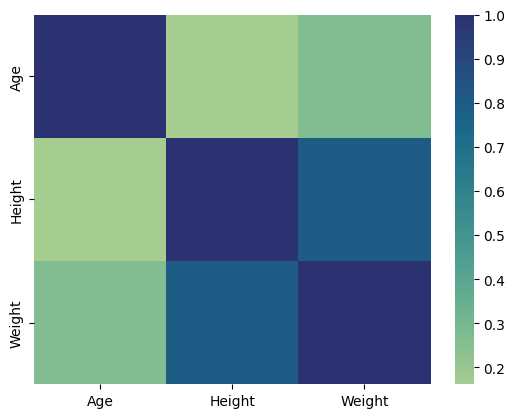

In [ ]:
sns.heatmap(olympics[['Age', 'Height', 'Weight']].corr(), cmap='crest')

### 29. Plot the histograms of `Age`, with different colors for different `Sex`

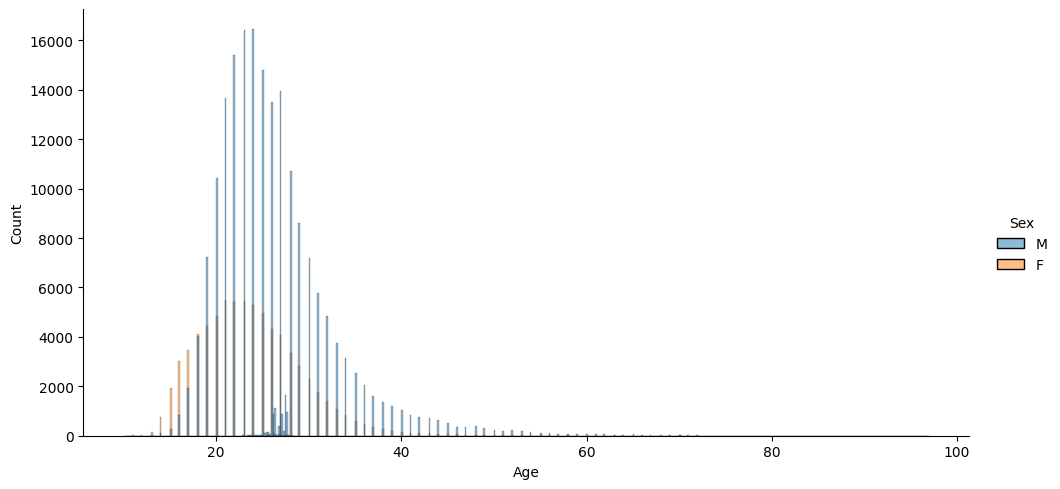

In [ ]:
sns.displot(data=olympics, x='Age', hue='Sex', aspect=2)

### 30. Plot the histograms of `Age`, on separate plots for different `Sex`

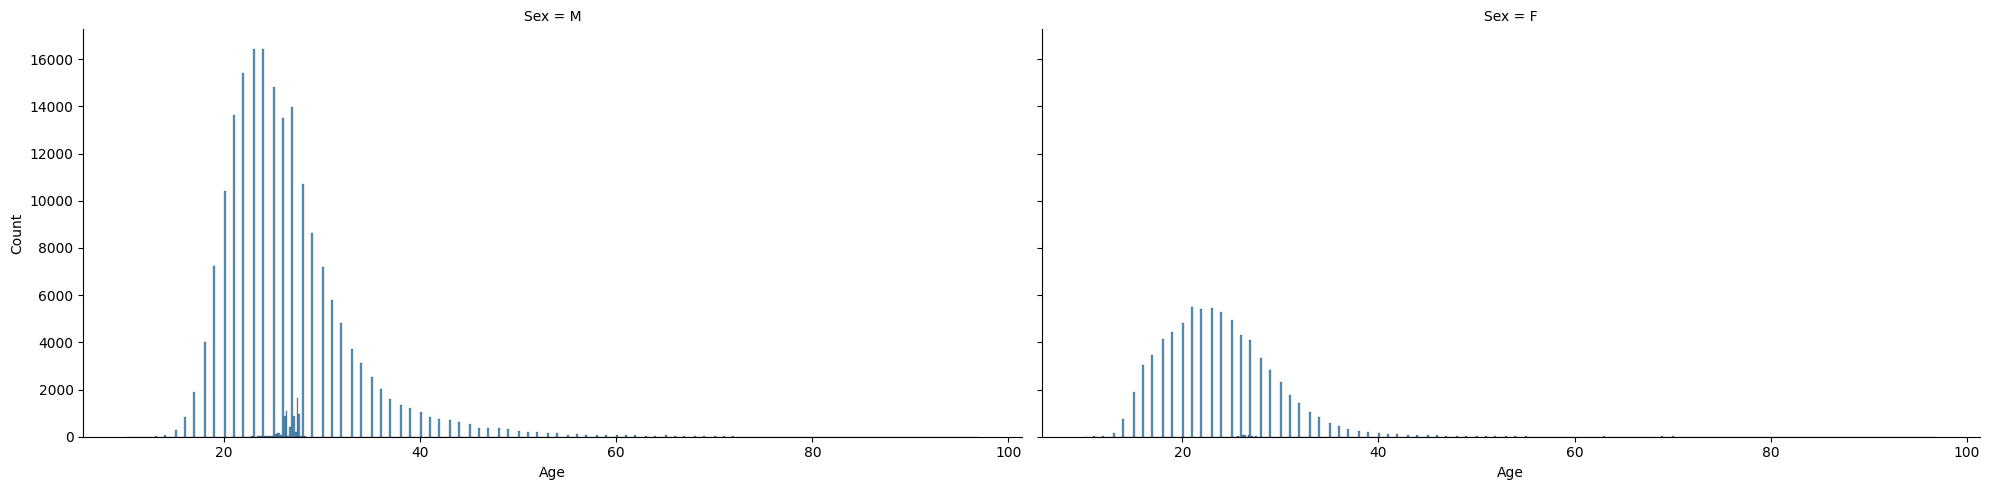

In [ ]:
sns.displot(data=olympics, x='Age', col='Sex', aspect=2)

### 31. Look at the changes of average `Age` across `Year` by line charts, with separate lines for different `Season` using different colors

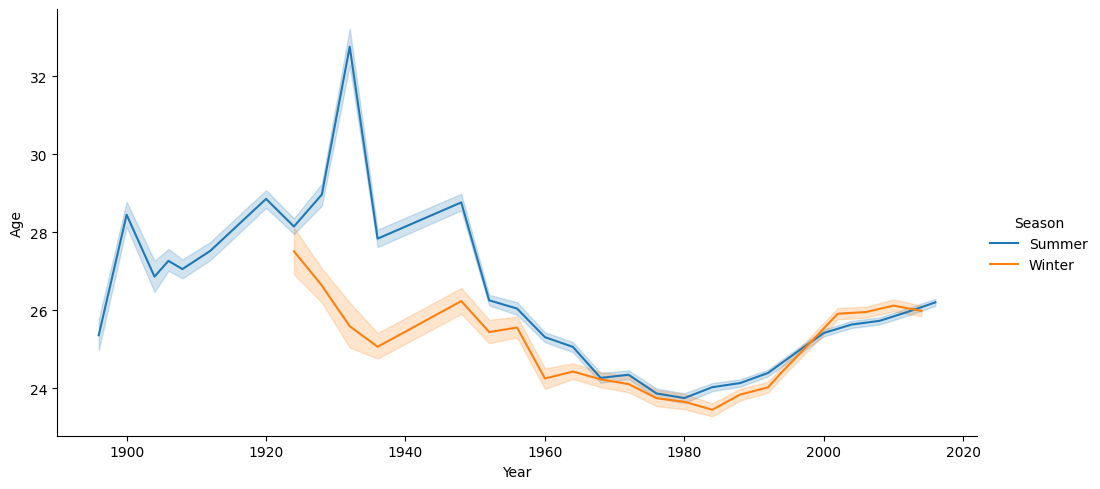

In [ ]:
sns.relplot(data=olympics, x='Year', y='Age', hue='Season', kind='line', aspect=2)

### 32. Look at the distributions of `Age` for different `Sex` using boxplots

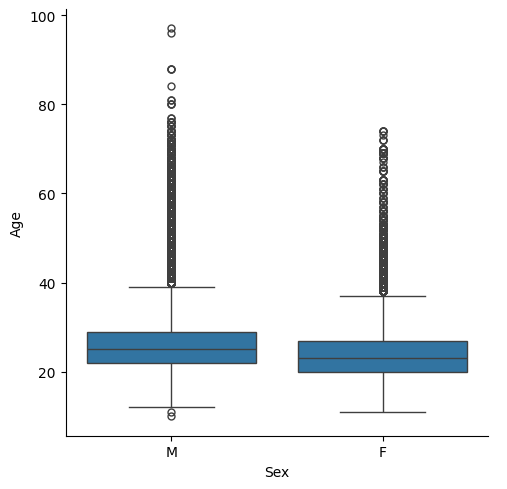

In [ ]:
sns.catplot(data=olympics, x='Sex', y='Age', kind='box')

### 33. Look at the distributions of `Age` for different `Sex` using violin plots

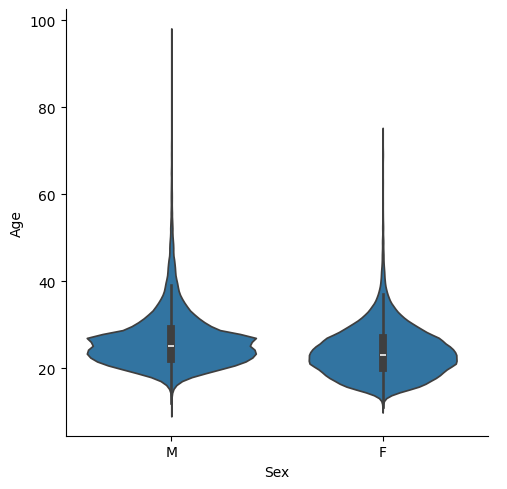

In [ ]:
sns.catplot(data=olympics, x='Sex', y='Age', kind='violin')

### 34. Look at the distributions of `Age` for different `Sex` using boxplots, with different colors of plots for different `Season`

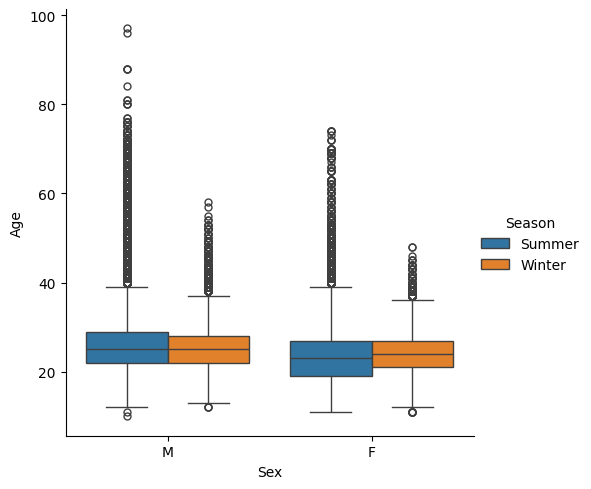

In [ ]:
sns.catplot(data=olympics, x='Sex', y='Age', kind='box', hue='Season')

### 35. Use count plots to look at the changes of number of athlete-events across `Year`, for different `Sex` by colors, and different `Season` on separate plots

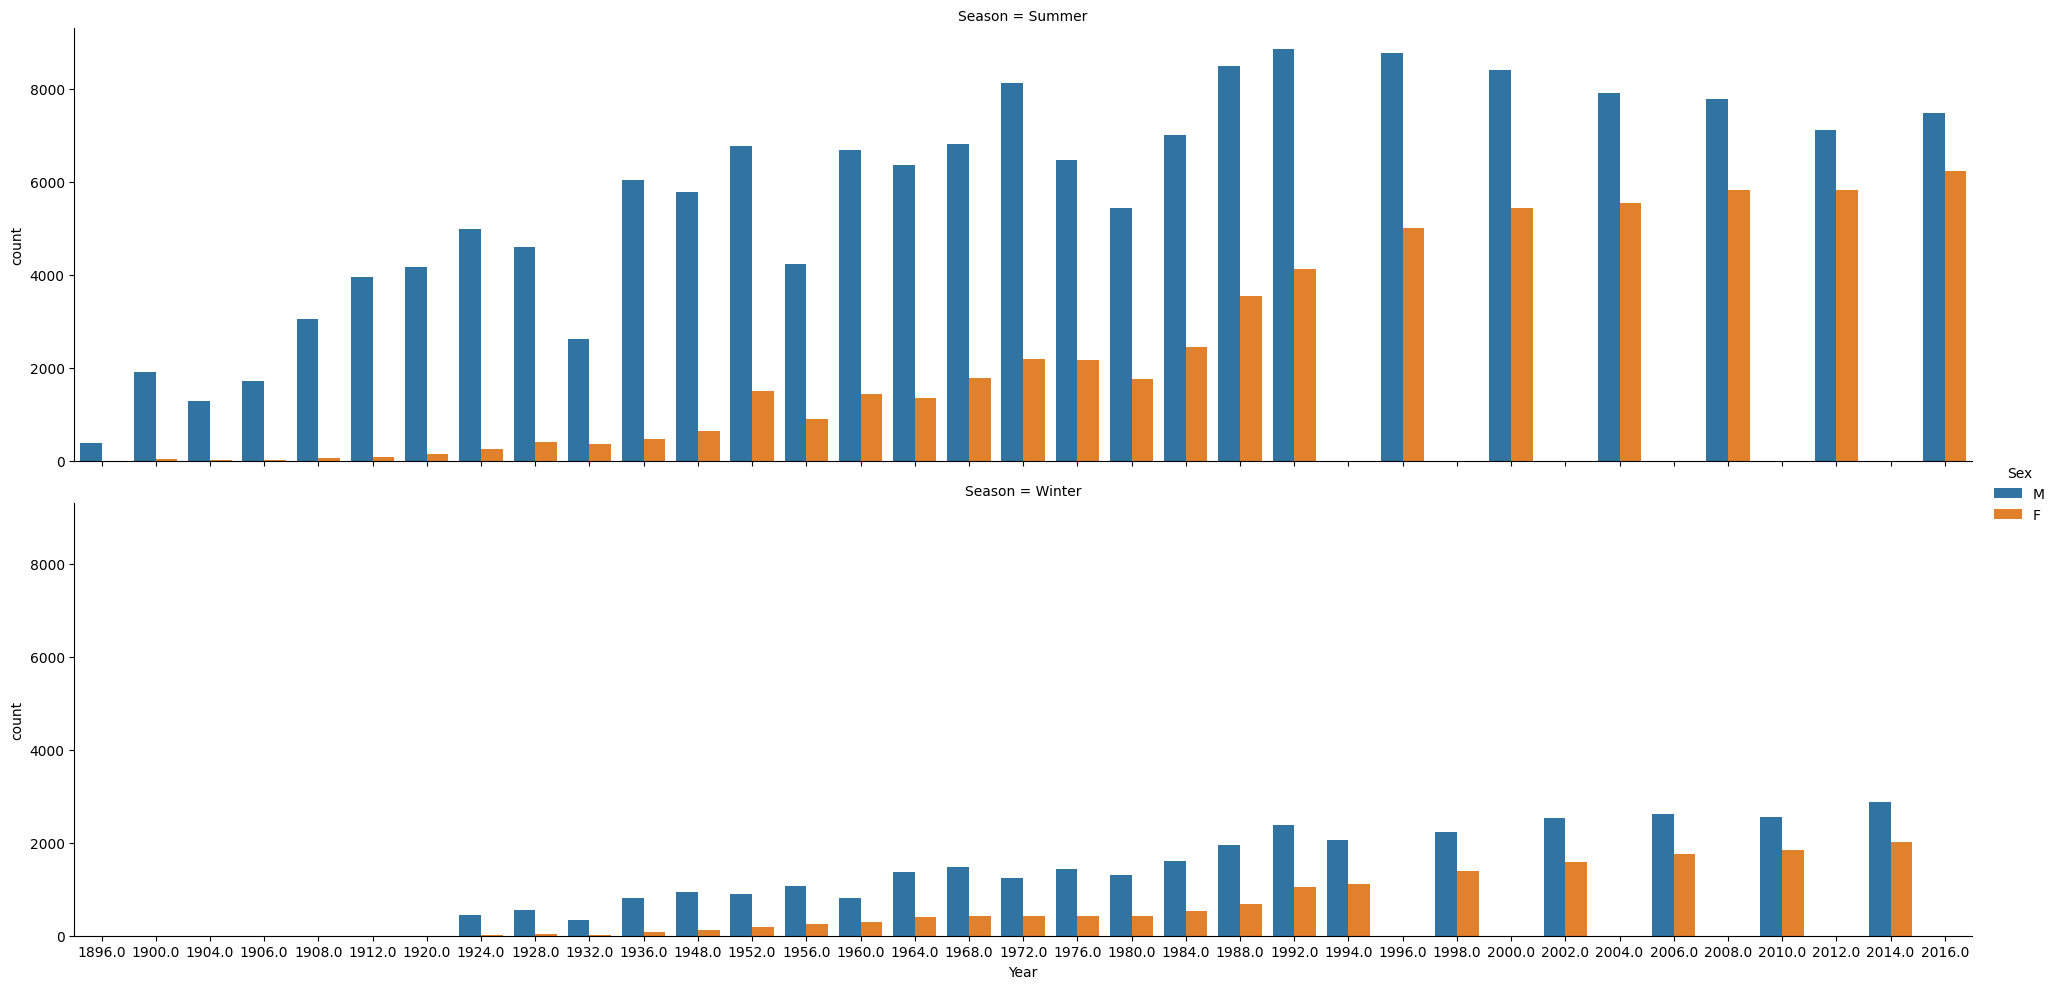

In [ ]:
sns.catplot(data=olympics, x='Year', hue='Sex', kind='count', col='Season', col_wrap=1, aspect=4)